In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.style.use('csdh.mplstyle')

In [2]:
DATA_FILENAME = "csdh_data.csv"
DATA_FILEPATH = "/Users/callum/Uni/GitHubRepos/surviving-the-icu/datasets/drain_data/" + DATA_FILENAME

In [3]:
csdh = pd.read_csv(DATA_FILEPATH).iloc[:,1:] # drop first index column

In [4]:
csdh.tail(20)

,age,sex,hospital,diabetes,dementia,copd,stroke,ihd,arrhythmia,epilepsy,...,optype,surgeon,anaesthetic,csdhcolour,drain,drain_end,drain_entry,drain_days,timetoop_corrected,recurrence
773,93,0,9,1,1,0,0,0,0,0,...,1.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0
774,94,1,21,0,0,0,0,0,1,0,...,1.0,3.0,1.0,1.0,0.0,NaN,NaN,NaN,2.0,0.0
775,94,1,5,0,0,0,1,0,0,0,...,1.0,3.0,1.0,4.0,1.0,1.0,2.0,1.0,2.0,0.0
776,94,0,5,0,1,0,0,1,0,0,...,1.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0
777,94,1,18,0,0,0,0,1,1,0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0
778,92,0,13,0,0,0,1,0,0,0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0
779,94,1,6,1,0,0,0,1,0,0,...,1.0,3.0,1.0,2.0,1.0,1.0,NaN,2.0,2.0,1.0
780,94,0,6,0,1,0,1,1,0,0,...,1.0,3.0,2.0,2.0,0.0,NaN,NaN,NaN,1.0,0.0
781,94,1,4,0,0,0,0,0,0,0,...,1.0,3.0,2.0,1.0,0.0,NaN,NaN,NaN,1.0,0.0
782,94,1,11,1,0,0,1,0,0,0,...,1.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0


In [5]:
reduced_cols = ['age', 'sex', 'hospital', 'surgeon', 'drain', 'optype']

In [6]:
viz_df = csdh.copy()[reduced_cols]

In [7]:
viz_df.tail(10)

,age,sex,hospital,surgeon,drain,optype
783,94,0,11,3.0,1.0,1.0
784,94,0,24,3.0,1.0,1.0
785,95,1,5,3.0,1.0,1.0
786,95,1,4,3.0,1.0,1.0
787,95,0,19,3.0,1.0,1.0
788,96,0,18,2.0,1.0,1.0
789,96,0,3,2.0,1.0,1.0
790,97,1,4,3.0,1.0,1.0
791,98,1,18,2.0,1.0,1.0
792,99,1,6,3.0,1.0,1.0


---
# DataViz Begins...

## Distributional Summary

In [8]:
print(f"The median patient age is {viz_df.age.median()}")

The median patient age is 77.0


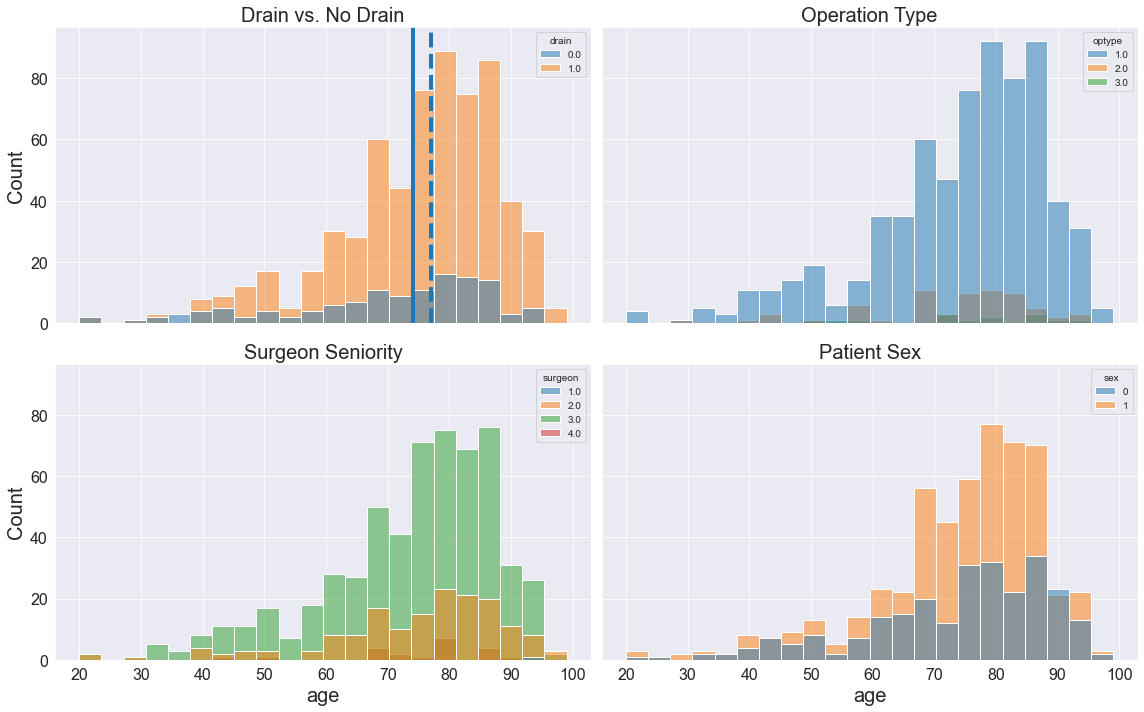

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)

# ax1
sns.histplot(data = viz_df, x='age', hue='drain', ax=ax1, palette='tab10')
ax1.axvline(viz_df.age.mean(), lw=4, label='mean')
ax1.axvline(viz_df.age.median(), ls='--', lw=4, label='median')
ax1.set_title('Drain vs. No Drain')

# ax2
sns.histplot(data = viz_df, x='age', hue='optype', palette='tab10', ax=ax2)
ax2.set_title('Operation Type')

# ax3
sns.histplot(data = viz_df, x='age', hue='surgeon', palette='tab10', ax=ax3)
ax3.set_title('Surgeon Seniority')

# ax4
sns.histplot(data = viz_df, x='age', hue='sex', palette='tab10', ax=ax4)
ax4.set_title('Patient Sex')

plt.tight_layout()
plt.show()

## Categorical Summary

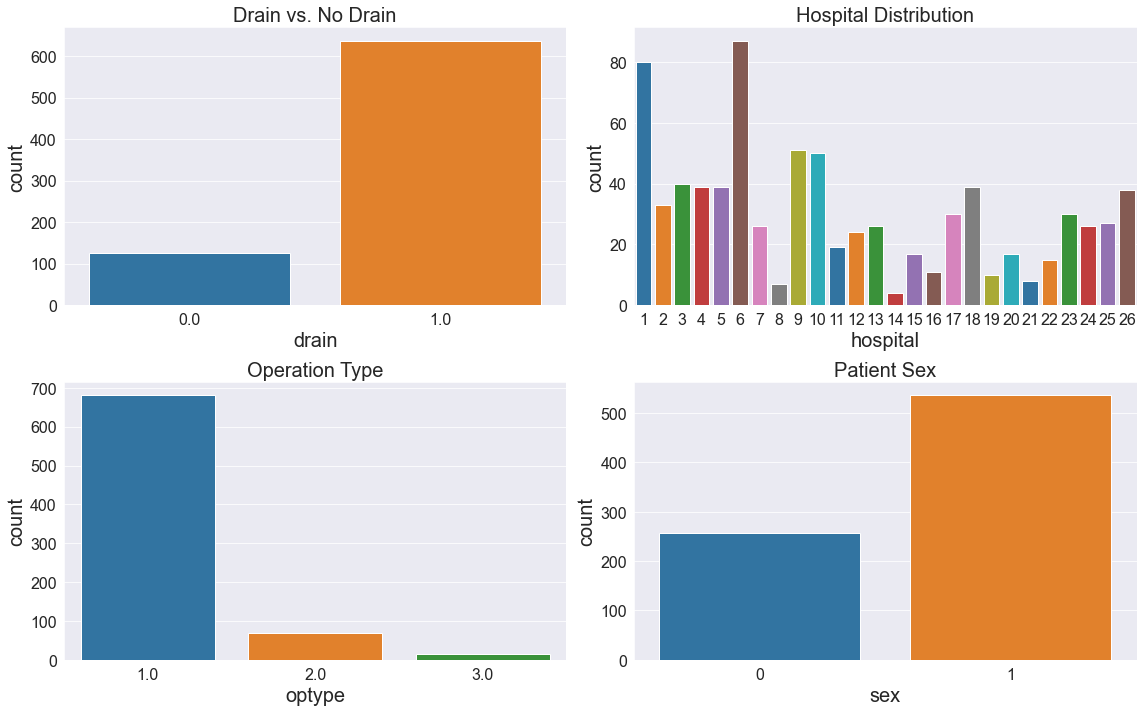

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# ax1
sns.countplot(data=viz_df, x='drain', palette='tab10', ax=ax1)
ax1.set_title('Drain vs. No Drain')

# ax2
sns.countplot(data=viz_df, x='hospital',palette='tab10', ax=ax2)
ax2.set_title('Hospital Distribution')

# ax3
sns.countplot(data=viz_df, x='optype', palette='tab10', ax=ax3)
ax3.set_title('Operation Type')

# ax4
sns.countplot(data = viz_df, x='sex', palette='tab10', ax=ax4)
ax4.set_title('Patient Sex')

plt.tight_layout()
plt.show()

# Missing Data

In [11]:
# Counting NaNs
md_df = csdh.isna().sum().to_frame(name="missing_data_count").reset_index()
md_df = md_df.rename(columns={"index":"covariate"})
# Sorting.
md_df = md_df.sort_values(by="missing_data_count", ascending=False)
# Remove zeros
md_df = md_df.drop(md_df[md_df['missing_data_count']==0].index)

In [12]:
md_df

,covariate,missing_data_count
47,drain_entry,258
48,drain_days,156
46,drain_end,156
44,csdhcolour,31
43,anaesthetic,30
42,surgeon,30
41,optype,30
45,drain,30
50,recurrence,19
49,timetoop_corrected,1


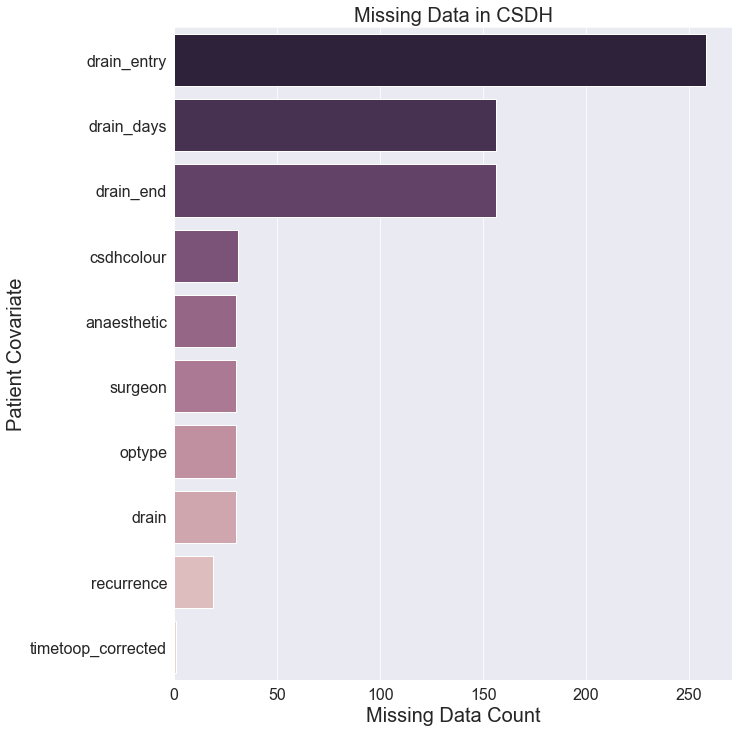

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
pal = sns.cubehelix_palette(md_df.shape[0])[::-1]
sns.barplot(x="missing_data_count", y="covariate", data=md_df, palette=pal)
ax.set(xlabel='Missing Data Count', ylabel='Patient Covariate', title='Missing Data in CSDH')
plt.show()

### We observe that the drain related variabes have a very high count of missing data but note that we have considered every single patient included in the study. Instead, let us subset our data on patients who recieved the `drain` intervention. 

In [14]:
csdh_drain = csdh[csdh['drain']==1]

In [15]:
# Counting NaNs
md_df_drain = csdh_drain.isna().sum().to_frame(name="missing_data_count").reset_index()
md_df_drain = md_df_drain.rename(columns={"index":"covariate"})
# Sorting.
md_df_drain = md_df_drain.sort_values(by="missing_data_count", ascending=False)
# Remove zeros
md_df_drain = md_df_drain.drop(md_df_drain[md_df_drain['missing_data_count']==0].index)

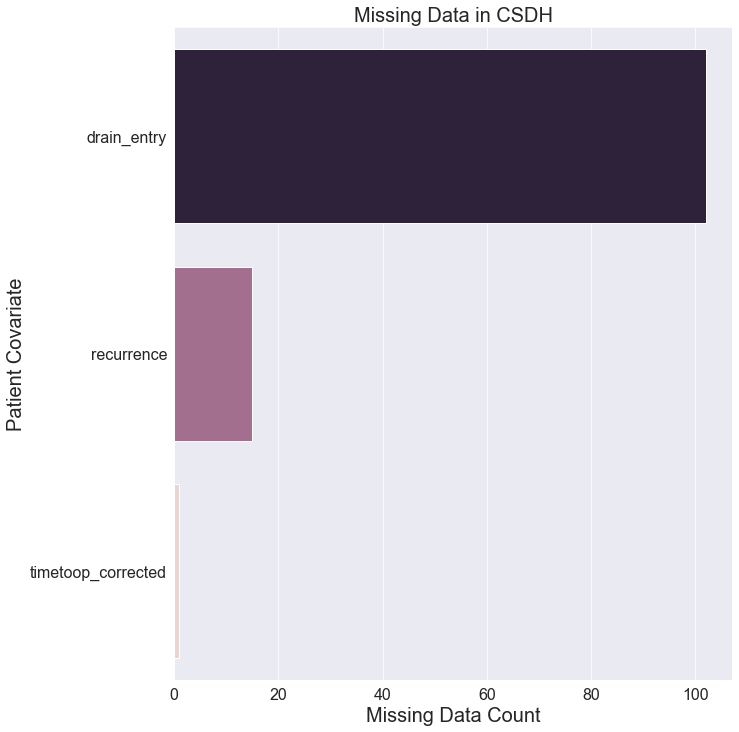

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
pal = sns.cubehelix_palette(md_df_drain.shape[0])[::-1]
sns.barplot(x="missing_data_count", y="covariate", data=md_df_drain, palette=pal)
ax.set(xlabel='Missing Data Count', ylabel='Patient Covariate', title='Missing Data in CSDH')
plt.show()

### Interesting. Most of the missing data is concentrated in patients who are `drain=0` or `drain=NaN` i.e. did not receive the treatment of interest or is missing itself. We do still observe, however, a substantial amount of missing data for the `drain_entry` variable even when the patient received the `drain` treatment. Why is this? How can we correct for this if this variable is important in the DAG? Note: Michael said hospital may be useful to impute drain_entry.

### Another point of concern is the missing data in perhaps the most important `recurrence` variable. Not sure how to approach this one --> maybe < 20 people can be safely dropped from the dataset. 

### Finally ~ 30 entries in the dataset present `drain == NaN` --> does this need imputing?


---

# DAG Variables

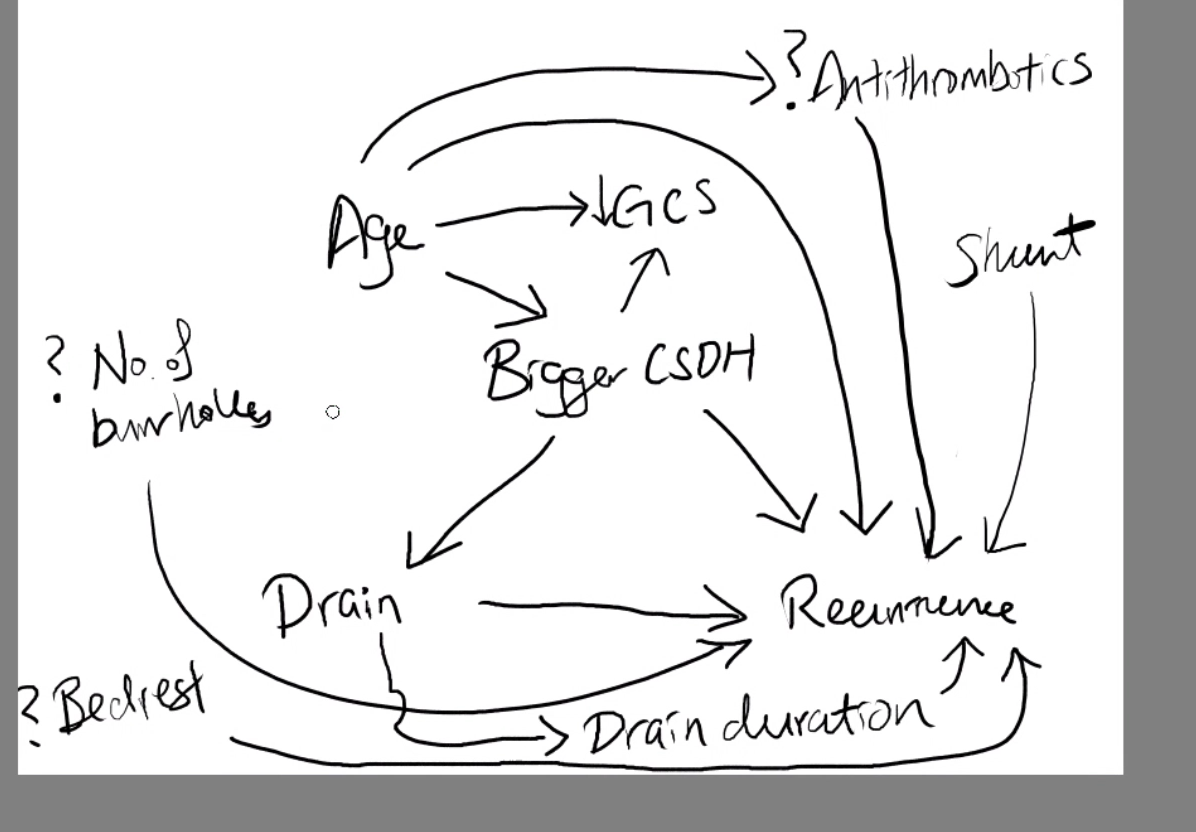

## Thickness

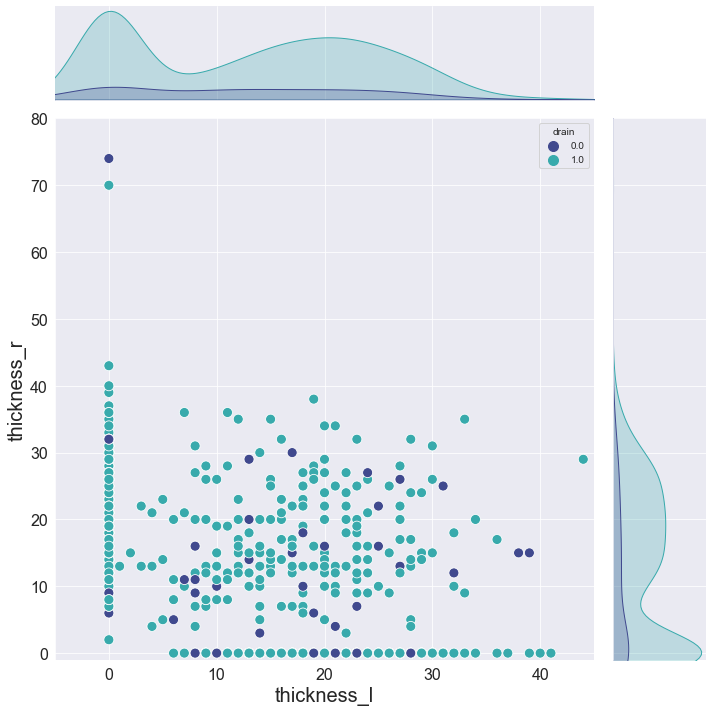

In [28]:
ax = sns.jointplot(data=csdh, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="drain", 
                   ax=ax,
                   xlim=(-5,45),
                   ylim=(-1, 80),
                   height=10, palette=sns.color_palette("mako", 2))
plt.show()

### Let's have a look at those patients who have measurements for both `thickness_l` and `thickness_r` grouped by the `drain variable`.

In [18]:
csdh_thick = csdh[(csdh['thickness_l'] != 0) & (csdh['thickness_r'] != 0)]

### No obvious patterns emerging

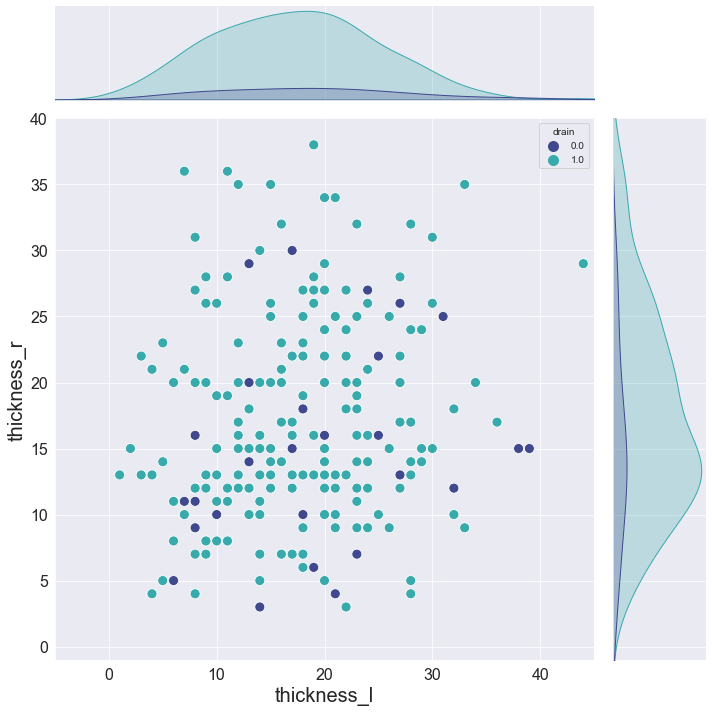

In [31]:
ax = sns.jointplot(data=csdh_thick, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="drain", 
                   ax=ax,
                   xlim=(-5,45),
                   ylim=(-1, 40),
                   height=10, palette=sns.color_palette("mako", 2))
plt.show()

### What if we grouped by surgeon? Paul and Michael mentioned that senior surgeons often take over if there are complications? Maybe complications are more likely to arise if the hematoma is larger?

### Nope.

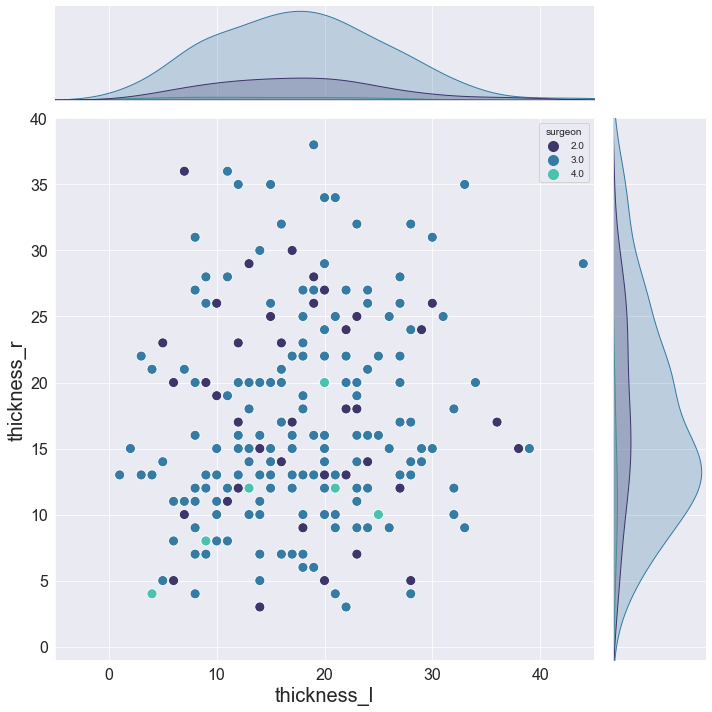

In [33]:
ax = sns.jointplot(data=csdh_thick, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="surgeon", 
                   ax=ax,
                   xlim=(-5,45),
                   ylim=(-1, 40),
                   height=10, palette=sns.color_palette("mako", 3))
plt.show()